In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

## 大綱
   * [Correlation Cofficient](#Correlation-Cofficient-Compute)
   * [Cosine Similarity](#Cosine-Similarity)
   * [Covariance](#Covariance)

In [2]:
brc = datasets.load_breast_cancer()

data = pd.DataFrame(brc['data'], columns=brc['feature_names'])
labels = pd.DataFrame(brc['target'], columns=['label'])
Brc = pd.concat([data, labels], axis = 1)
Brc.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

## Correlation Cofficient Compute

In [3]:
#Z-score Standardize
#怕被outliers影響 所以不用min-max normalize
Brc_0 = Brc.copy()
#最後一個columns是label 所以去掉
for i in Brc_0.columns[:-1]:
    Brc_0[i] = (Brc_0[i] - Brc_0[i].mean()) / Brc_0[i].std()

Brc_0.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness   
0     1.096100     -2.071512        1.268817   0.983510         1.567087  \
1     1.828212     -0.353322        1.684473   1.907030        -0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3    -0.768233      0.253509       -0.592166  -0.763792         3.280667   
4     1.748758     -1.150804        1.775011   1.824624         0.280125   

   mean compactness  mean concavity  mean concave points  mean symmetry   
0          3.280628        2.650542             2.530249       2.215566  \
1         -0.486643       -0.023825             0.547662       0.001391   
2          1.052000        1.362280             2.035440       0.938859   
3          3.399917        1.914213             1.450431       2.864862   
4          0.538866        1.369806             1.427237      -0.009552   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area   
0                2.253764  ...      -1.358098         2.301575    1.999478  \
1               -0.867889  ...      -0.368879         1.533776    1.888827   
2               -0.397658  ...      -0.023953         1.346291    1.455004   
3                4.906602  ...       0.133866        -0.249720   -0.549538   
4               -0.561956  ...      -1.465481         1.337363    1.219651   

   worst smoothness  worst compactness  worst concavity  worst concave points   
0          1.306537           2.614365         2.107672              2.294058  \
1         -0.375282          -0.430066        -0.146620              1.086129   
2          0.526944           1.081980         0.854222              1.953282   
3          3.391291           3.889975         1.987839              2.173873   
4          0.220362          -0.313119         0.612640              0.728618   

   worst symmetry  worst fractal dimension  label  
0        2.748204                 1.935312      0  
1       -0.243675                 0.280943      0  
2        1.151242                 0.201214      0  
3        6.040726                 4.930672      0  
4       -0.867590                -0.396751      0  

[5 rows x 31 columns]

In [4]:
corr = Brc_0.iloc[:, :-1].corr()
corr.head()

mean radius  mean texture  mean perimeter  mean area   
mean radius         1.000000      0.323782        0.997855   0.987357  \
mean texture        0.323782      1.000000        0.329533   0.321086   
mean perimeter      0.997855      0.329533        1.000000   0.986507   
mean area           0.987357      0.321086        0.986507   1.000000   
mean smoothness     0.170581     -0.023389        0.207278   0.177028   

                 mean smoothness  mean compactness  mean concavity   
mean radius             0.170581          0.506124        0.676764  \
mean texture           -0.023389          0.236702        0.302418   
mean perimeter          0.207278          0.556936        0.716136   
mean area               0.177028          0.498502        0.685983   
mean smoothness         1.000000          0.659123        0.521984   

                 mean concave points  mean symmetry  mean fractal dimension   
mean radius                 0.822529       0.147741               -0.311631  \
mean texture                0.293464       0.071401               -0.076437   
mean perimeter              0.850977       0.183027               -0.261477   
mean area                   0.823269       0.151293               -0.283110   
mean smoothness             0.553695       0.557775                0.584792   

                 ...  worst radius  worst texture  worst perimeter   
mean radius      ...      0.969539       0.297008         0.965137  \
mean texture     ...      0.352573       0.912045         0.358040   
mean perimeter   ...      0.969476       0.303038         0.970387   
mean area        ...      0.962746       0.287489         0.959120   
mean smoothness  ...      0.213120       0.036072         0.238853   

                 worst area  worst smoothness  worst compactness   
mean radius        0.941082          0.119616           0.413463  \
mean texture       0.343546          0.077503           0.277830   
mean perimeter     0.941550          0.150549           0.455774   
mean area          0.959213          0.123523           0.390410   
mean smoothness    0.206718          0.805324           0.472468   

                 worst concavity  worst concave points  worst symmetry   
mean radius             0.526911              0.744214        0.163953  \
mean texture            0.301025              0.295316        0.105008   
mean perimeter          0.563879              0.771241        0.189115   
mean area               0.512606              0.722017        0.143570   
mean smoothness         0.434926              0.503053        0.394309   

                 worst fractal dimension  
mean radius                     0.007066  
mean texture                    0.119205  
mean perimeter                  0.051019  
mean area                       0.003738  
mean smoothness                 0.499316  

[5 rows x 30 columns]

<Axes: >

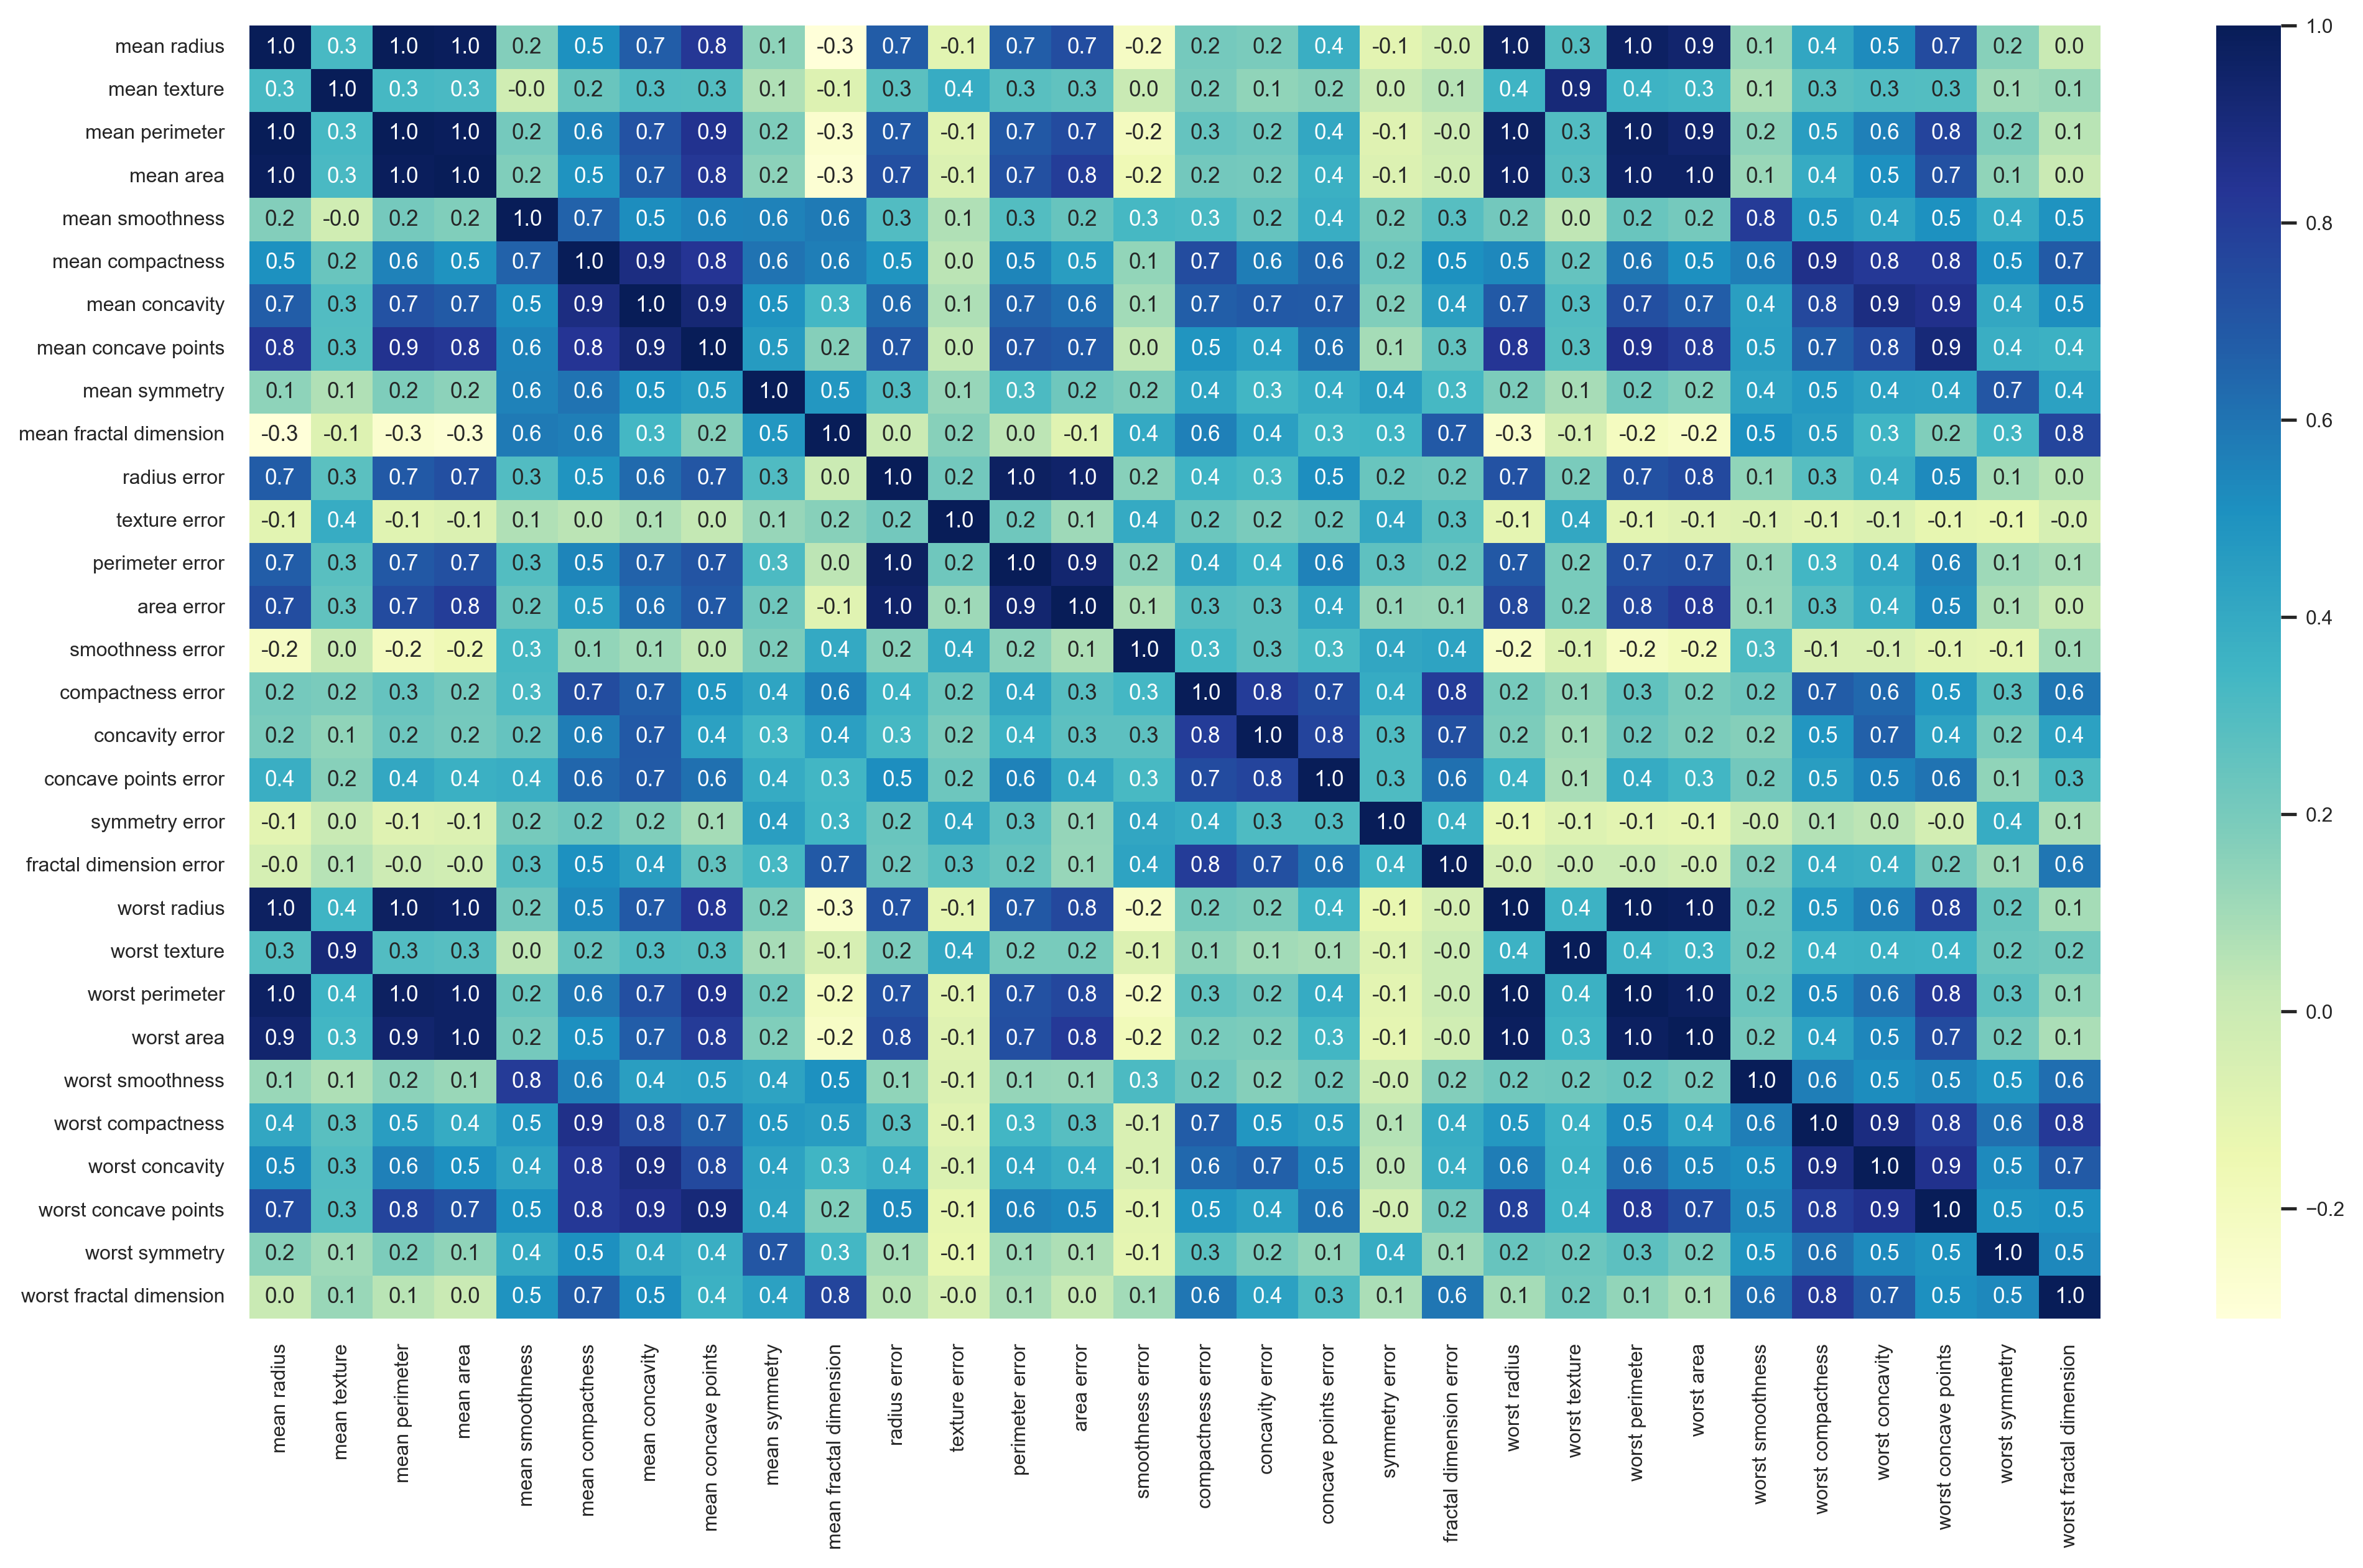

In [5]:
sns.set(font_scale=0.7)
plt.figure(figsize=(16, 9), dpi = 300)
sns.heatmap(corr, annot=True, cmap = 'YlGnBu', fmt=".1f")

In [6]:
#找出關聯度高於0.9的屬性 之後可能可以剃除以減少運算成本
corrDic = {}

for key in corr.columns:
    index = corr.columns[corr[key].abs() >= 0.9].drop(key)
    if index.size > 0:
        corrDic[key] = index.values
            
for i in corrDic:
    print(i + ':', corrDic[i])

mean radius: ['mean perimeter' 'mean area' 'worst radius' 'worst perimeter'
 'worst area']
mean texture: ['worst texture']
mean perimeter: ['mean radius' 'mean area' 'worst radius' 'worst perimeter' 'worst area']
mean area: ['mean radius' 'mean perimeter' 'worst radius' 'worst perimeter'
 'worst area']
mean concavity: ['mean concave points']
mean concave points: ['mean concavity' 'worst concave points']
radius error: ['perimeter error' 'area error']
perimeter error: ['radius error' 'area error']
area error: ['radius error' 'perimeter error']
worst radius: ['mean radius' 'mean perimeter' 'mean area' 'worst perimeter' 'worst area']
worst texture: ['mean texture']
worst perimeter: ['mean radius' 'mean perimeter' 'mean area' 'worst radius' 'worst area']
worst area: ['mean radius' 'mean perimeter' 'mean area' 'worst radius'
 'worst perimeter']
worst concave points: ['mean concave points']


['mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area', 'worst texture', 'mean concavity', 'worst compactness', 'mean perimeter', 'mean concavity', 'worst perimeter', 'worst concave points', 'perimeter error', 'area error', 'mean concavity', 'worst compactness', 'worst concave points']


<Axes: >

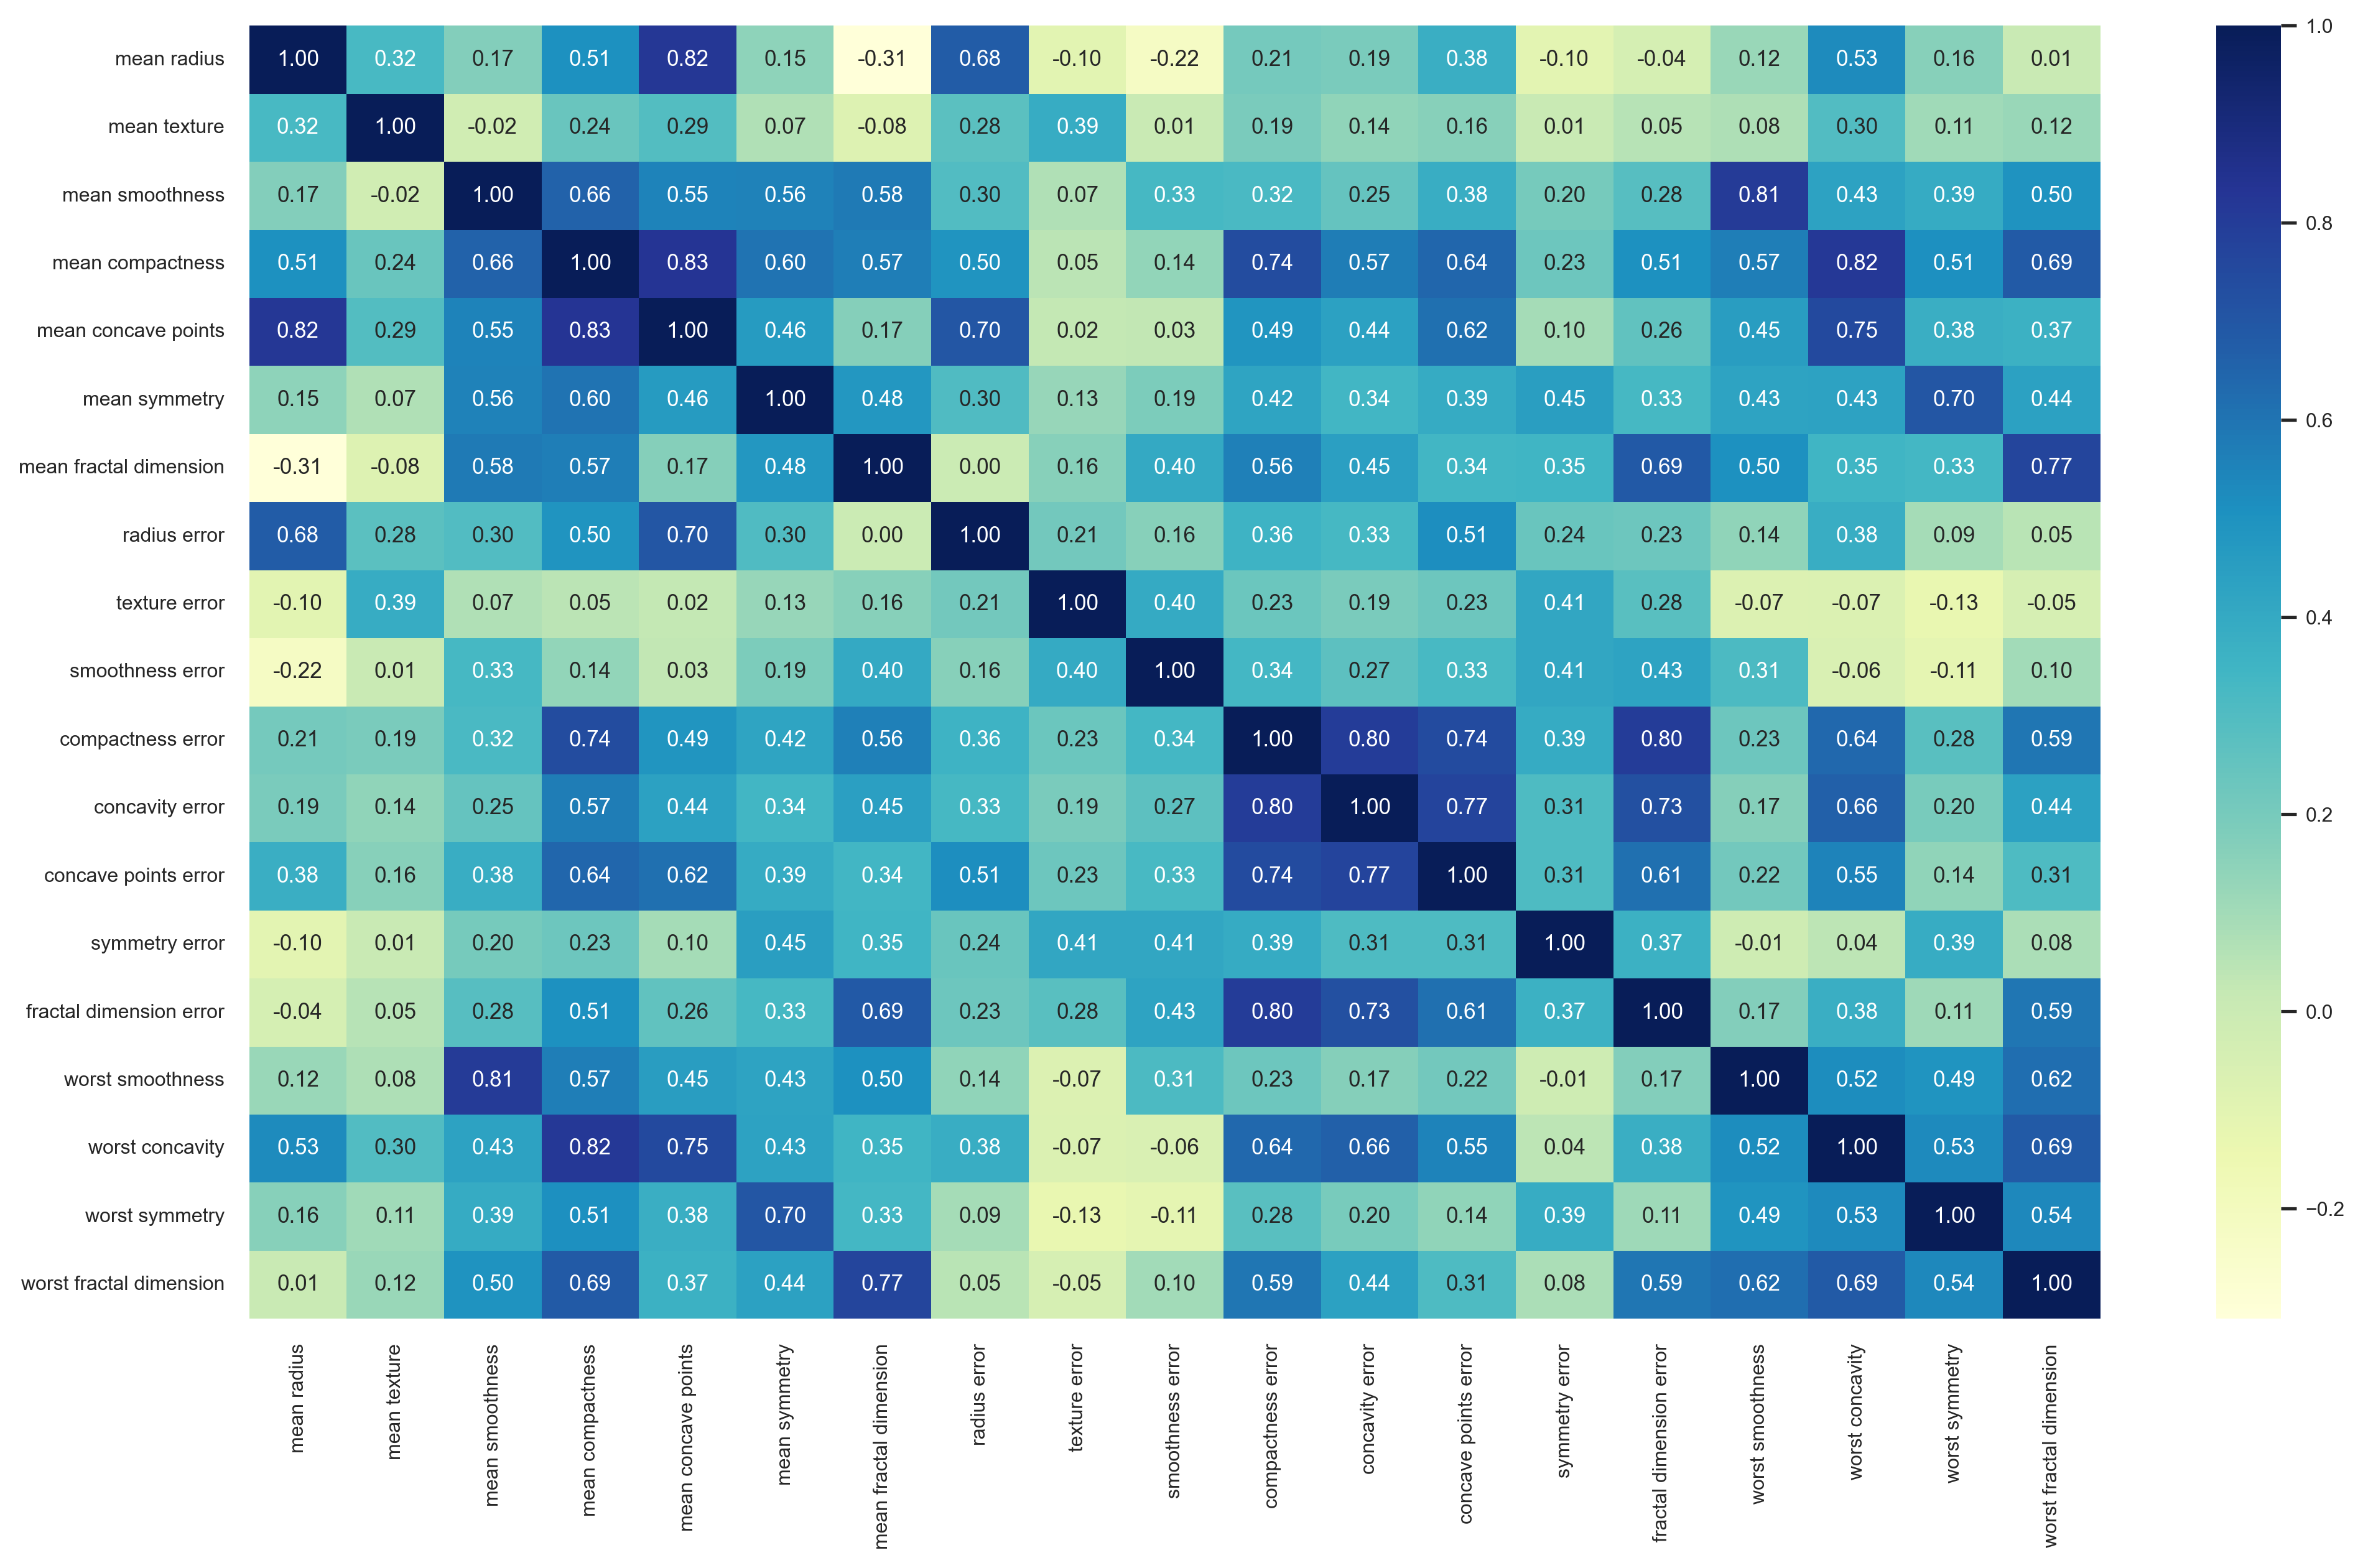

In [7]:
#找出關聯度高於0.85的屬性 之後可能可以剃除以減少運算成本
attrs = []
for i in corr:
    if i in attrs:continue
    keys = corr[i].keys()
    for key in keys:
        if i != key and abs(corr[i][key]) > 0.85:
            attrs.append(key)
            
print(attrs)
Brc_3 = Brc.drop(attrs, axis = 1)
corr_2 = Brc_3.iloc[:, :-1].corr()

sns.set(font_scale=0.7)
plt.figure(figsize=(16, 9), dpi = 300)
sns.heatmap(corr_2, annot=True, cmap = 'YlGnBu', fmt=".2f")

## Cosine Similarity

<Axes: >

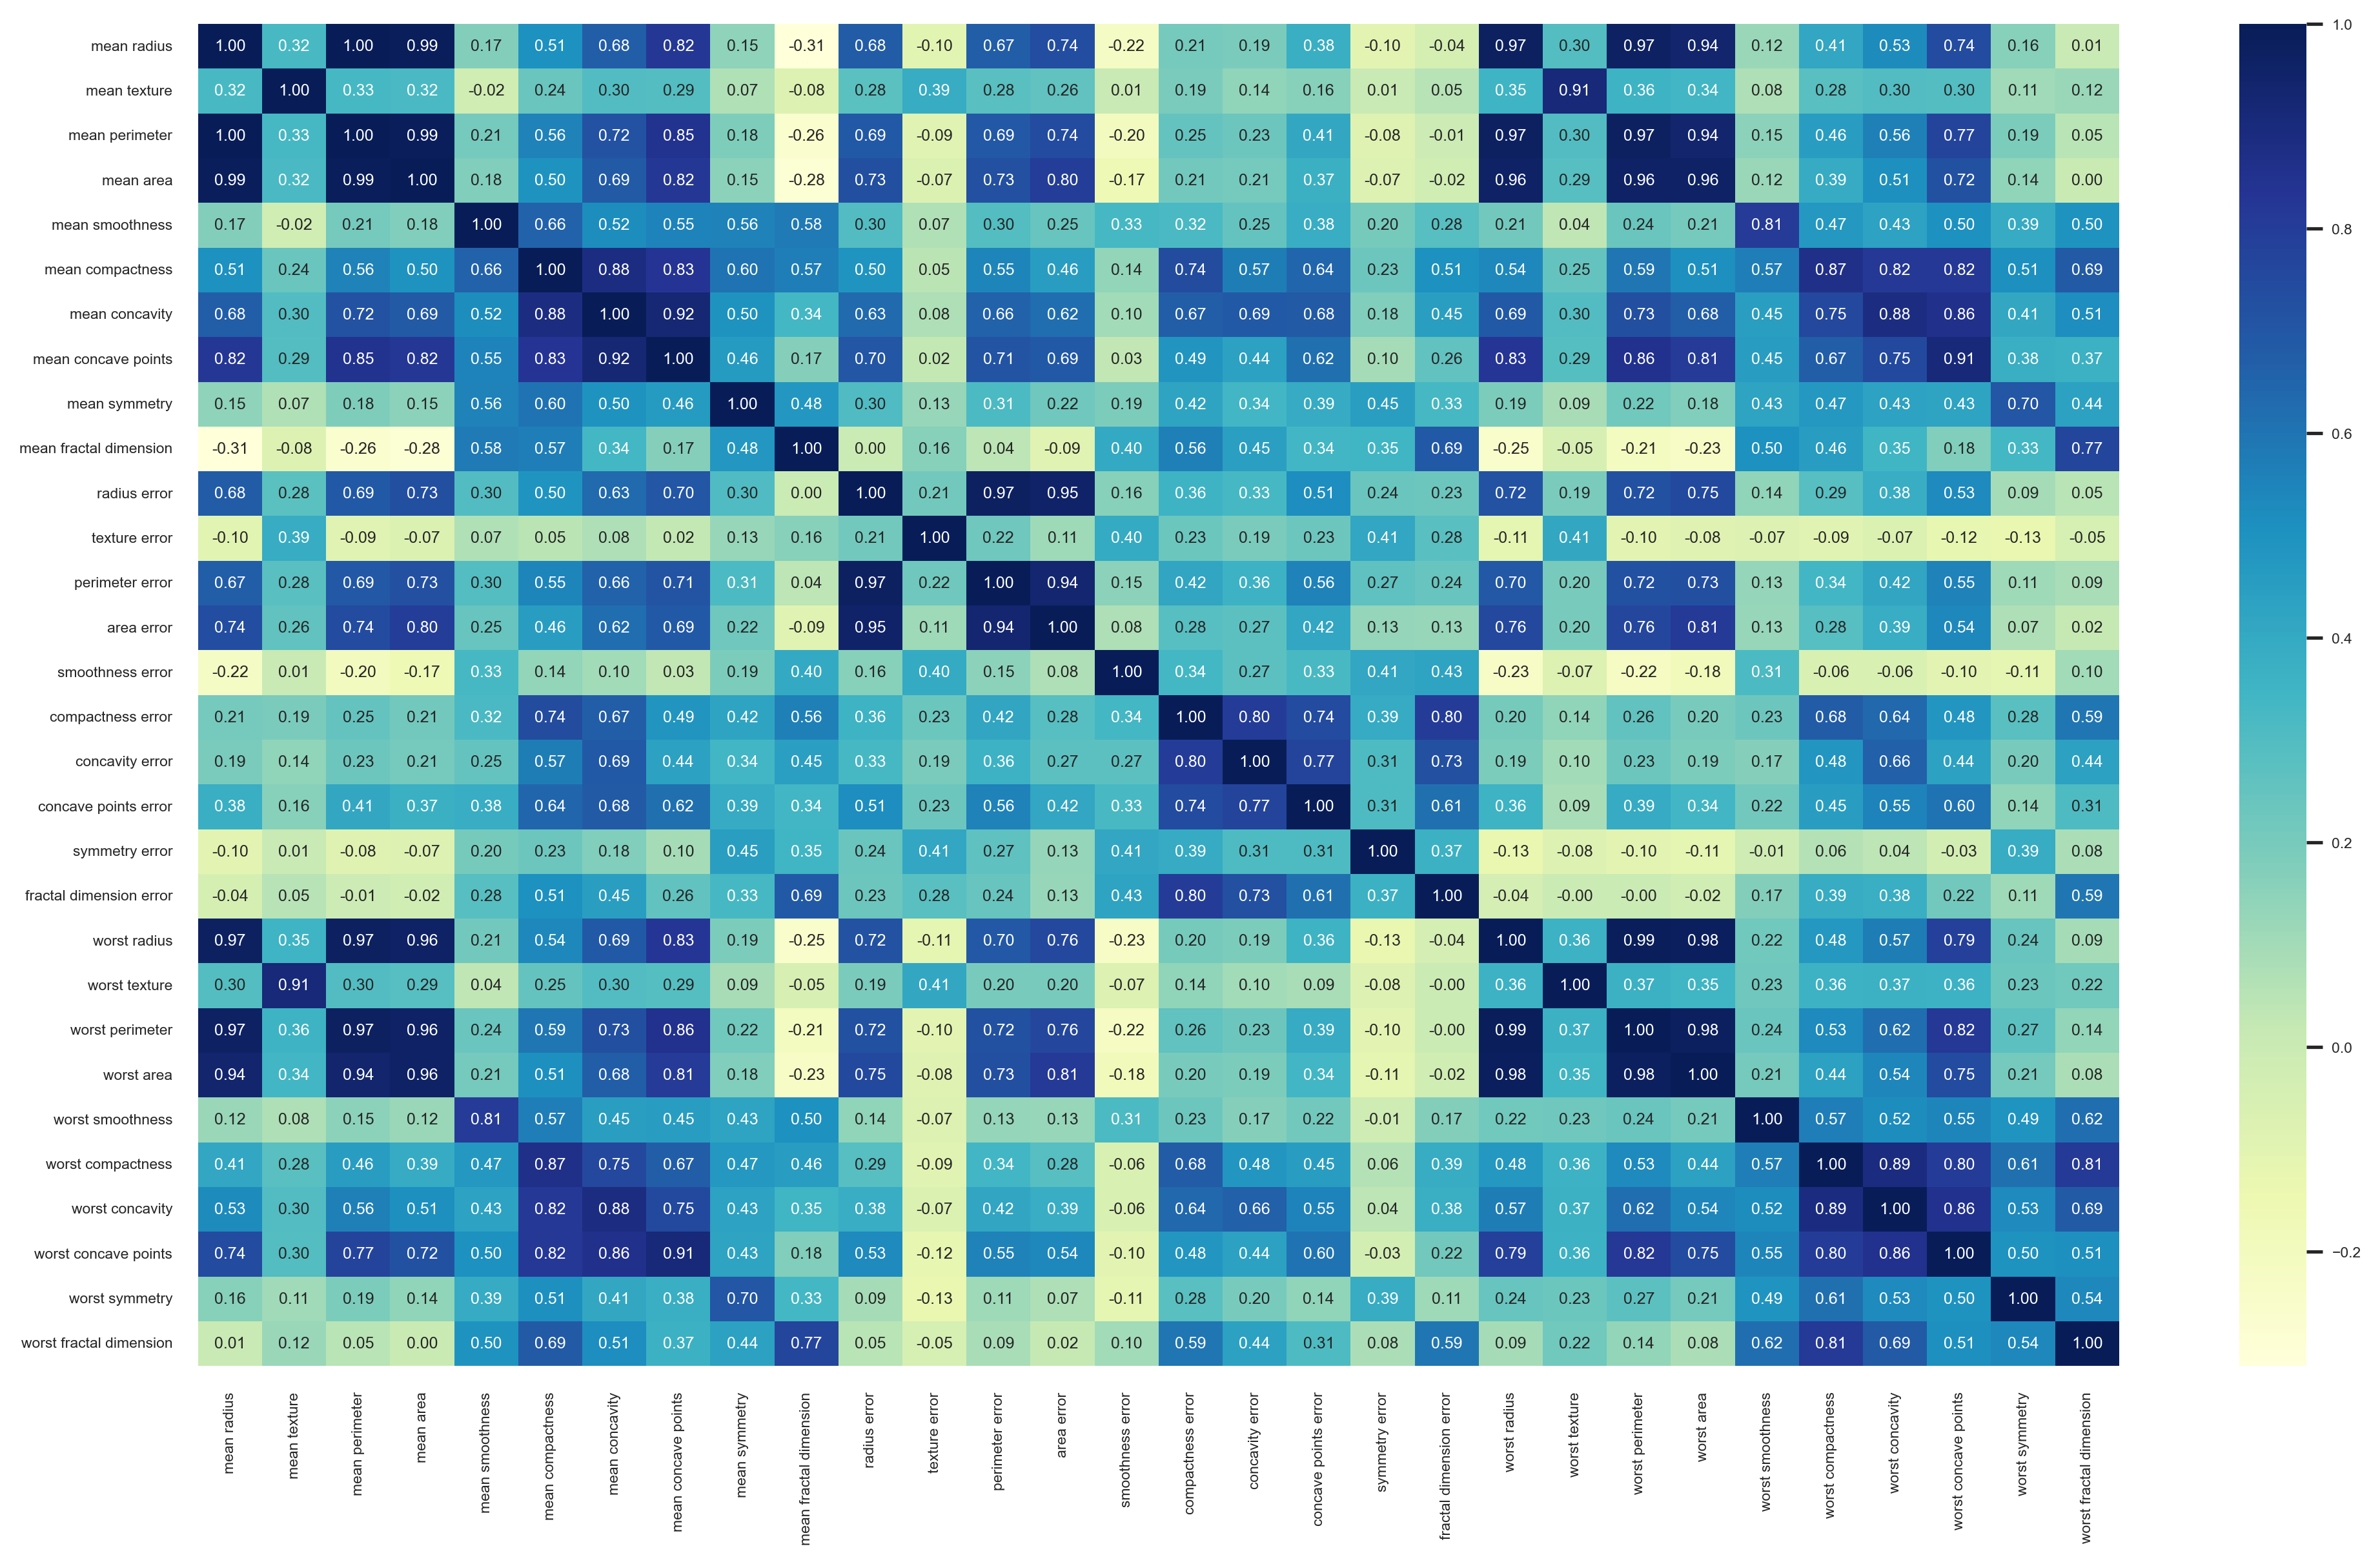

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

Brc_1 = Brc_0.iloc[:, :-1].transpose()

sim = cosine_similarity(Brc_1)

sns.set(font_scale=0.5)
plt.figure(figsize=(16, 9), dpi = 300)

#Brc_0.columns[:-1]是不要把label放進圖裡
sns.heatmap(sim, annot=True, cmap = 'YlGnBu', fmt=".2f", xticklabels=Brc_0.columns[:-1], yticklabels=Brc_0.columns[:-1])


## Covariance

<Axes: >

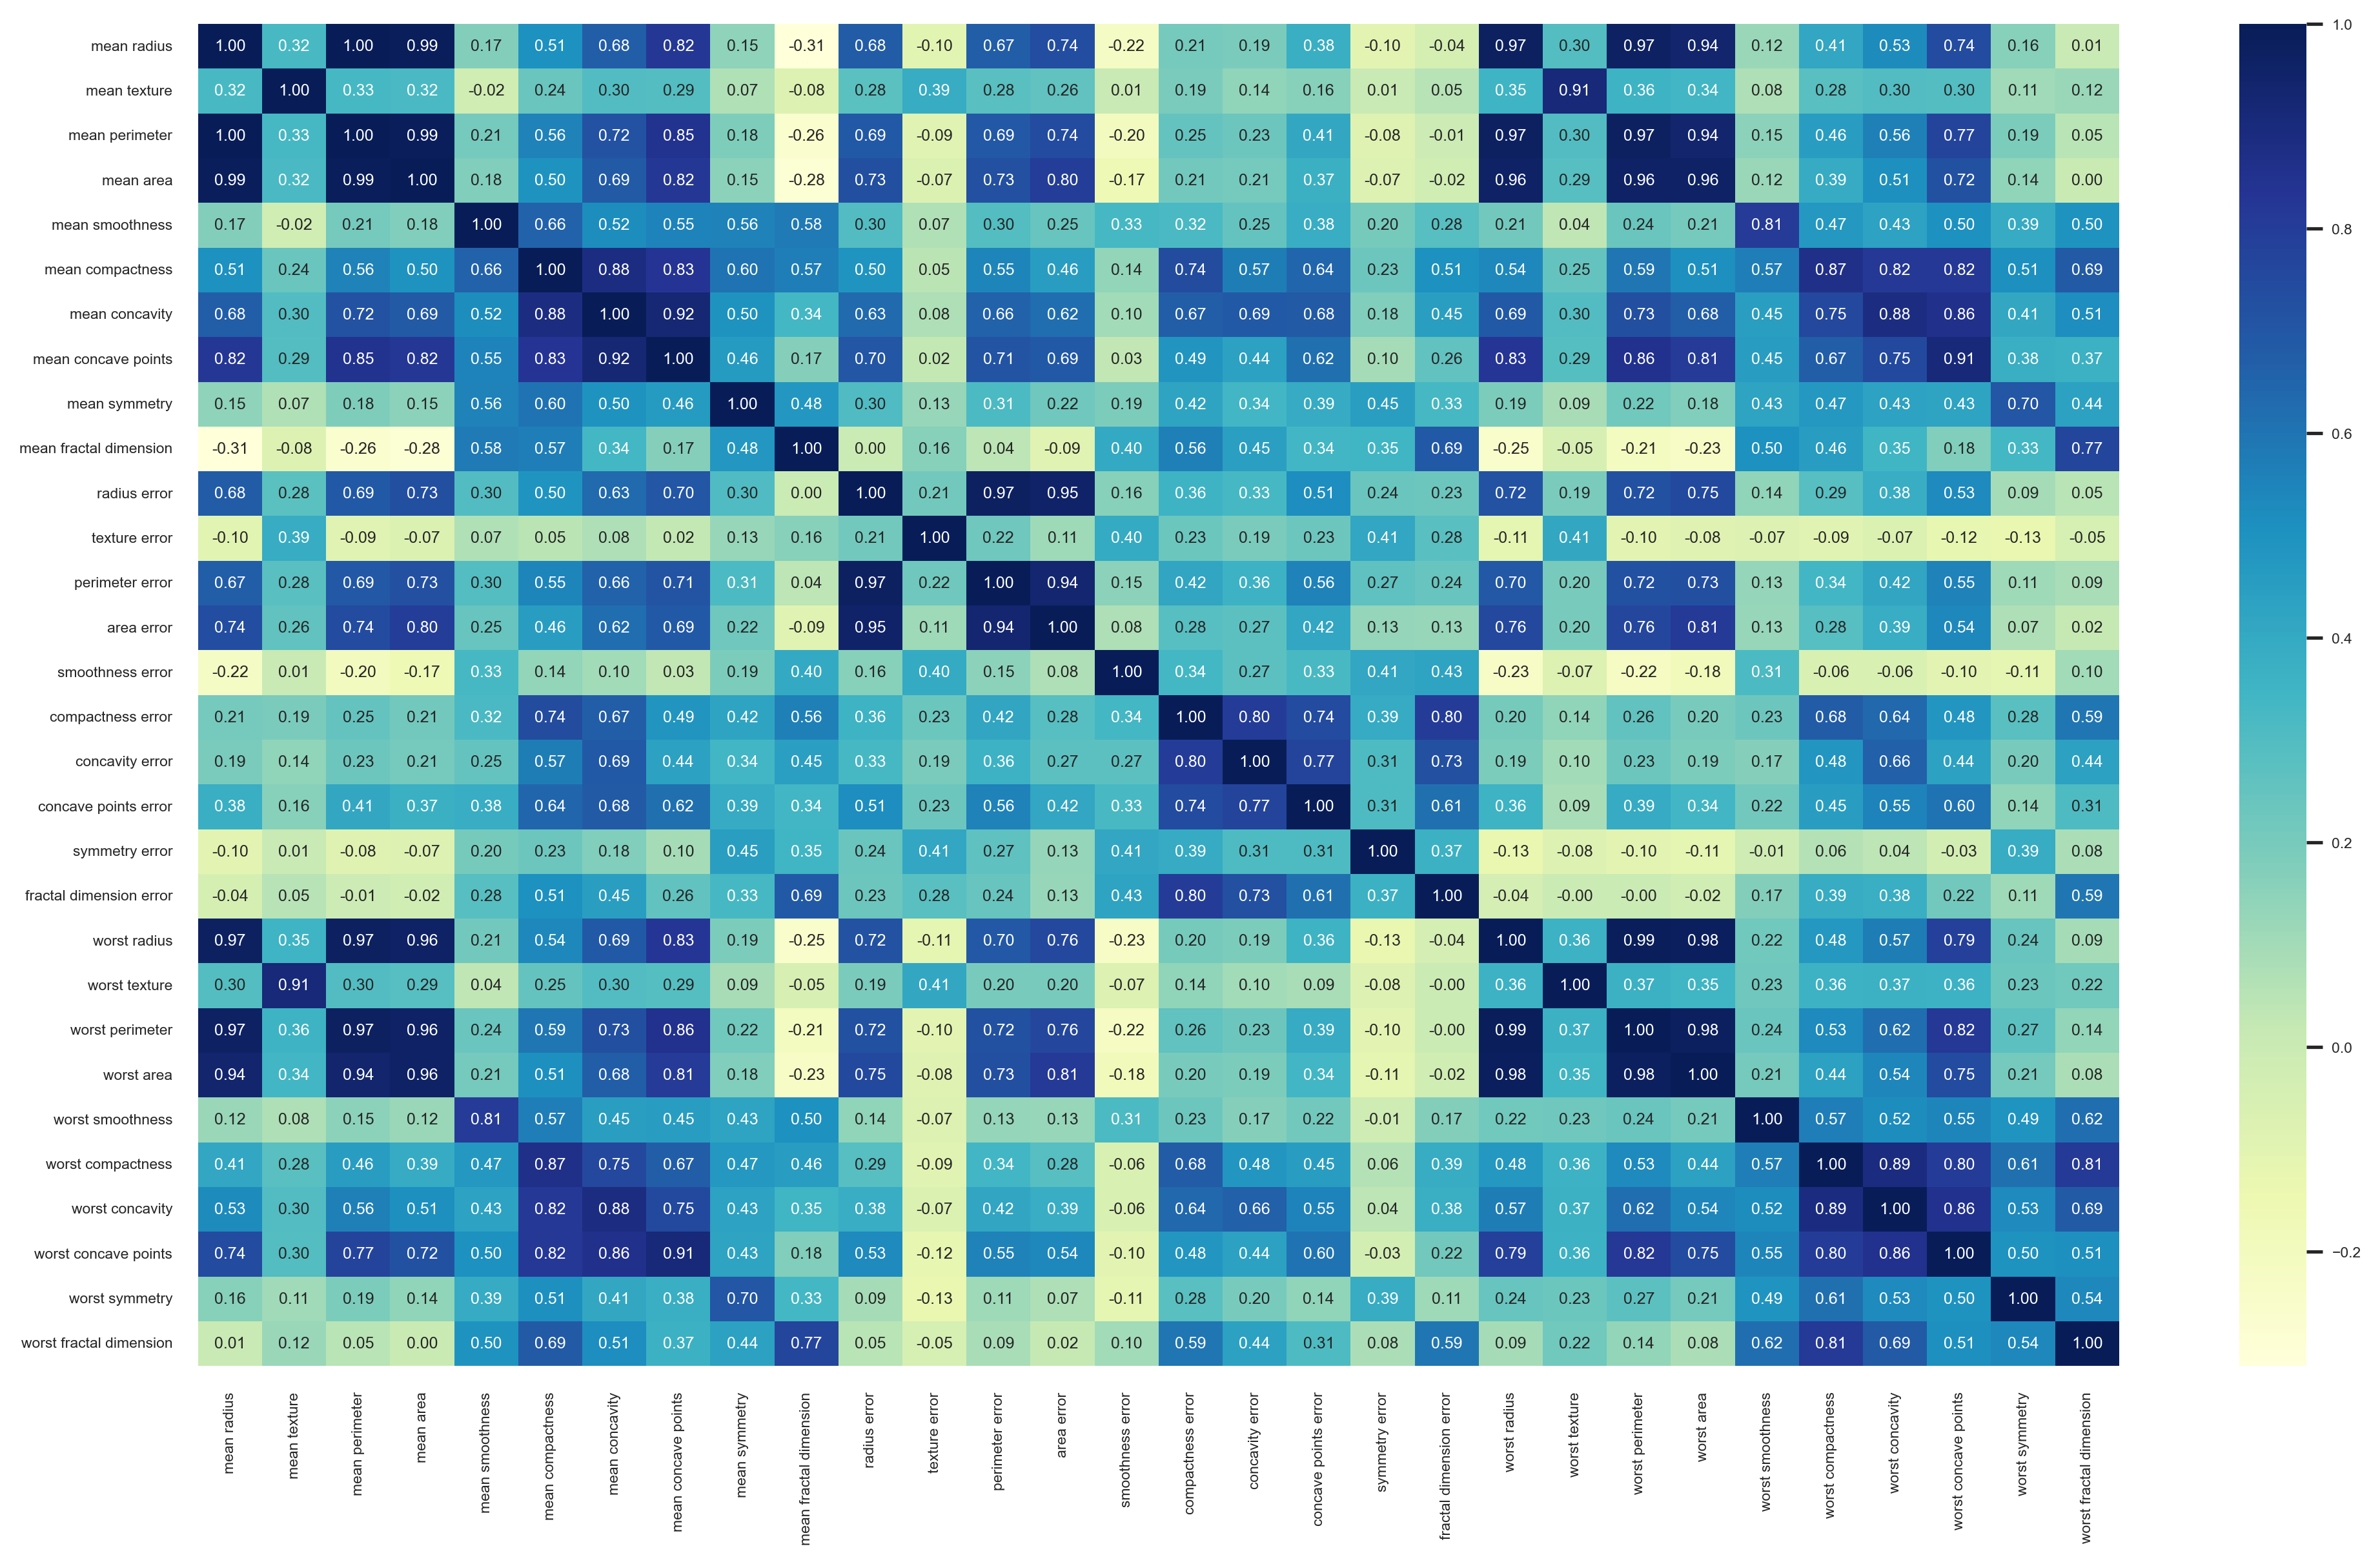

In [9]:
Brc_2 = Brc_0.copy()

cov = Brc_2.iloc[:, :-1].cov()

sns.set(font_scale=0.5)
plt.figure(figsize=(16, 9), dpi = 300)
sns.heatmap(cov, annot=True, cmap = 'YlGnBu', fmt=".2f")